# IMDB CAPSTONE PROJECT


# PHASE-3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("data1.csv")
df1

,Unnamed: 0,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN
2,2,3,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN
3,3,4,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN
4,4,5,The Lord of the Rings: The Two Towers,179,2002,8.8,87,Peter Jackson,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1745,1745,"1,746",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN
1746,1746,"1,747",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN
1747,1747,"1,748",Angels Apocalypse,85,2015,1.7,Nan,Sean Cain,Enzo Zelocchi,NaN
1748,1748,"1,749",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN


In [3]:
df2=pd.read_csv("data2.csv")
df2

,Unnamed: 0,MovieName,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,0,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,718,392"
1,1,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,887,178"
2,2,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,413,147"
3,3,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,915,838"
4,4,The Lord of the Rings: The Two Towers,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,Action,Adventure,Drama,342.55,PG-13,"1,703,373"
...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1745,Radhe,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,804"
1746,1746,Race 3,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,585"
1747,1747,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,911"
1748,1748,The Cost of Deception,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,479"


In [4]:
df=pd.DataFrame()

In [5]:
df = pd.merge(df1, df2)
df

,Unnamed: 0,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,718,392"
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,887,178"
2,2,3,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,413,147"
3,3,4,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,915,838"
4,4,5,The Lord of the Rings: The Two Towers,179,2002,8.8,87,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,Action,Adventure,Drama,342.55,PG-13,"1,703,373"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1745,"1,746",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,804"
1746,1746,"1,747",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,585"
1747,1747,"1,748",Angels Apocalypse,85,2015,1.7,Nan,Sean Cain,Enzo Zelocchi,NaN,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,911"
1748,1748,"1,749",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,479"


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 1749
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S No.            1750 non-null   object 
 1   MovieName        1750 non-null   object 
 2   Duration         1750 non-null   int64  
 3   Year             1750 non-null   int64  
 4   Rating           1750 non-null   float64
 5   Metascore        1750 non-null   object 
 6   Director1        1750 non-null   object 
 7   Director2        112 non-null    object 
 8   Director3        12 non-null     object 
 9   Star1            1750 non-null   object 
 10  Star2            1750 non-null   object 
 11  Star3            1750 non-null   object 
 12  Star4            1750 non-null   object 
 13  Genre1           1750 non-null   object 
 14  Genre2           1750 non-null   object 
 15  Genre3           1750 non-null   object 
 16  GrossCollection  1750 non-null   object 
 17  Certification 

In [7]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

1        1
1,164    1
1,175    1
1,174    1
1,173    1
        ..
580      1
579      1
578      1
577      1
1,750    1
Name: S No., Length: 1750, dtype: int64
no of unique values 1750
*****************
G                                3
Mr                               3
Taxi                             2
Dune                             2
Kill Bill: Vol                   2
                                ..
Dragged Across Concrete          1
The Hitman's Bodyguard           1
Atlantis: The Lost Empire        1
Robin Hood: Prince of Thieves    1
Sadak 2                          1
Name: MovieName, Length: 1708, dtype: int64
no of unique values 1708
*****************
107    48
109    42
100    42
110    41
102    40
       ..
186     1
207     1
192     1
213     1
78      1
Name: Duration, Length: 119, dtype: int64
no of unique values 119
*****************
2016    78
2014    76
2018    70
2011    69
2013    67
        ..
1954     1
1938     1
1926     1
1958     1
1965     1
Name: Yea

In [8]:
df.replace("Nan", np.nan, inplace=True)
df.isnull().sum()

S No.                 0
MovieName             0
Duration              0
Year                  0
Rating                0
Metascore           184
Director1             0
Director2          1638
Director3          1738
Star1                 0
Star2                 1
Star3                 1
Star4                 2
Genre1                0
Genre2                2
Genre3              144
GrossCollection     279
Certification        10
votes                 0
dtype: int64

# Dropping off columns Director 2 and Director 3 as maxiumum entries are null values.

In [9]:
df.drop(["Director2","Director3"], axis=1, inplace=True)

Using mode to fill null values for object columns - Metascore, Certification and genre 3

In [10]:
df['Metascore']=df['Metascore'].fillna(df['Metascore'].mode()[0])
df['Certification'] = df['Certification'].fillna(df['Certification'].mode()[0])
df['Genre3'] =df['Genre3'].fillna(df['Genre3'].mode()[0])

First we converted column Gross collection to float dataype and then used mean to fill null values.

In [11]:
df['GrossCollection'] = df['GrossCollection'].astype(float)
df['GrossCollection'] = df['GrossCollection'].fillna(df['GrossCollection'].mean())

In [12]:
df.isnull().sum().sum()

6

In [13]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [14]:
df.duplicated().sum()

0

All null values have been treated or removed. No duplicates are there in the dataset.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 0 to 1749
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S No.            1746 non-null   object 
 1   MovieName        1746 non-null   object 
 2   Duration         1746 non-null   int64  
 3   Year             1746 non-null   int64  
 4   Rating           1746 non-null   float64
 5   Metascore        1746 non-null   object 
 6   Director1        1746 non-null   object 
 7   Star1            1746 non-null   object 
 8   Star2            1746 non-null   object 
 9   Star3            1746 non-null   object 
 10  Star4            1746 non-null   object 
 11  Genre1           1746 non-null   object 
 12  Genre2           1746 non-null   object 
 13  Genre3           1746 non-null   object 
 14  GrossCollection  1746 non-null   float64
 15  Certification    1746 non-null   object 
 16  votes            1746 non-null   object 
dtypes: float64(2),

Treating all columns which should be integer datatype but are object datatype.

In [16]:
df['Metascore'] = df['Metascore'].astype(int)
df['votes'] = df['votes'].str.replace(',', '').astype(int)
df['S No.'] = df['S No.'].str.replace(',', '').astype(int)

# EDA

In [17]:
df.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'GrossCollection', 'Certification', 'votes'],
      dtype='object')

# Duration

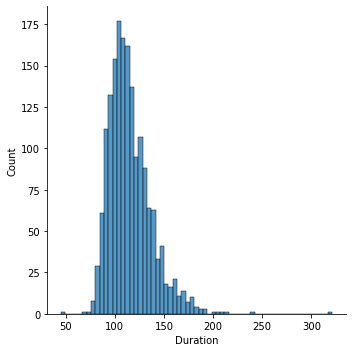

In [18]:
sns.displot(data=df, x="Duration",)

# Year

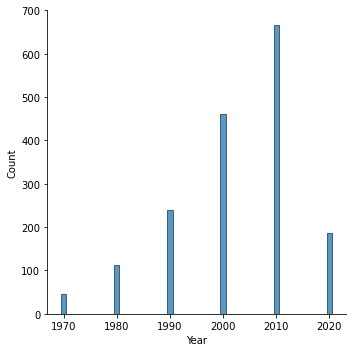

In [19]:
# Number of movies launched in the decades
sns.displot(pd.cut(df['Year'], bins=range(1970, 2031, 10), right=False, labels=range(1970, 2030, 10)))
plt.show()

Most movies have been launched in the decade of 2000-2010.

# Relation between years and ratings

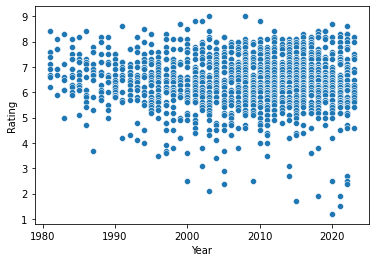

In [20]:
sns.scatterplot(x=df["Year"][df["Year"]>1980],y=df["Rating"])
plt.show()

# Metascore

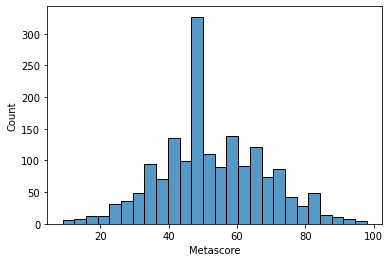

In [21]:
sns.histplot(x=df["Metascore"])
plt.show()

Metascore varies between 0 to 100 while most movies has metascore lies around 50

# Genre

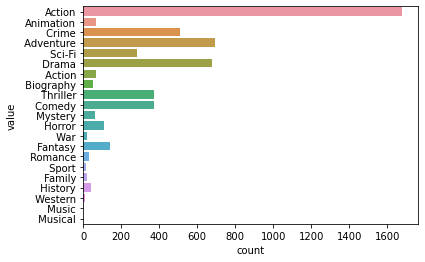

In [22]:
sns.countplot(data=pd.melt(df, value_vars=["Genre1", "Genre2", "Genre3"]), y="value")
plt.show()

Most movies are of action genre. While crime, adventure Sci-fi and drama are most common genre.

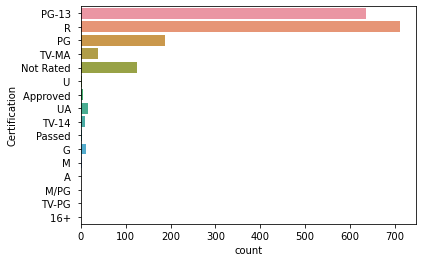

In [23]:
sns.countplot(y=df["Certification"])
plt.show()

# Most movies are PG-13 and R rated.

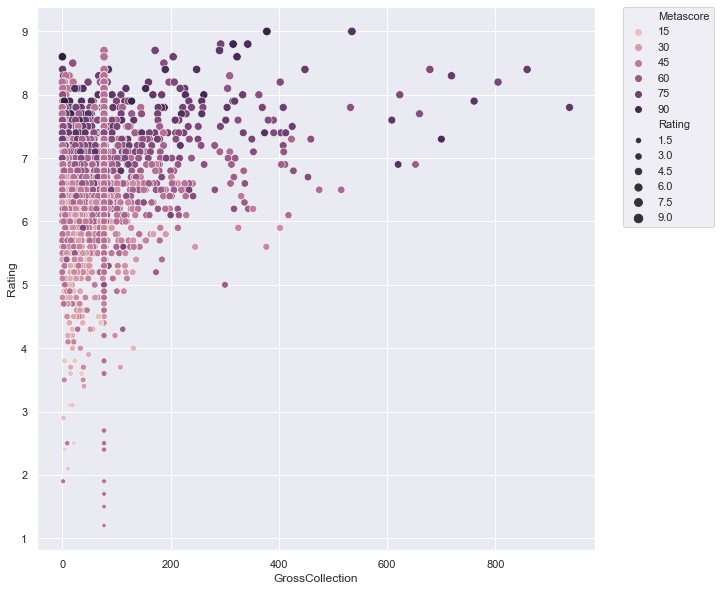

In [24]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="GrossCollection", y="Rating",
                      hue="Metascore", size="Rating",
                      data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

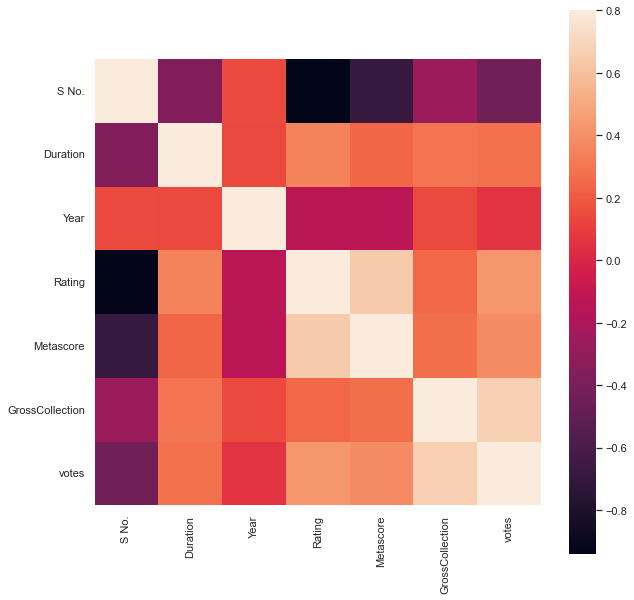

In [25]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), vmax=.8, square=True)
plt.show()

# PHASE-4

# Preparing for machine learning
Dropping off columns which are not useful for machine learning

In [26]:
df.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'GrossCollection', 'Certification', 'votes'],
      dtype='object')

In [27]:
df1=df.drop(["S No.","MovieName",], axis=1)

# Encoding the categorical data

In [28]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df1['Director1']=le.fit_transform(df1['Director1'])
df1['Star1']=le.fit_transform(df1['Star1'])
df1['Star2']=le.fit_transform(df1['Star2'])
df1['Star3']=le.fit_transform(df1['Star3'])
df1['Star4']=le.fit_transform(df1['Star4'])
df1['Genre1']=le.fit_transform(df1['Genre1'])
df1['Genre2']=le.fit_transform(df1['Genre2'])
df1['Genre3']=le.fit_transform(df1['Genre3'])
df1['Certification']=le.fit_transform(df1['Certification'])

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 0 to 1749
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         1746 non-null   int64  
 1   Year             1746 non-null   int64  
 2   Rating           1746 non-null   float64
 3   Metascore        1746 non-null   int32  
 4   Director1        1746 non-null   int32  
 5   Star1            1746 non-null   int32  
 6   Star2            1746 non-null   int32  
 7   Star3            1746 non-null   int32  
 8   Star4            1746 non-null   int32  
 9   Genre1           1746 non-null   int32  
 10  Genre2           1746 non-null   int32  
 11  Genre3           1746 non-null   int32  
 12  GrossCollection  1746 non-null   float64
 13  Certification    1746 non-null   int32  
 14  votes            1746 non-null   int32  
dtypes: float64(2), int32(11), int64(2)
memory usage: 207.8 KB


All columns have been converted into integer or float datatype.

# Outlier Treatment
using z-score

In [30]:
z=np.abs(zscore(df1))
dfn=df1[(z<3).all(axis=1)]
dfn

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
7,153,2020,8.7,48,861,637,864,94,1363,0,5,4,77.158022,12,119494
19,101,2003,8.4,77,656,109,1144,643,737,0,5,11,0.710000,10,596395
21,137,1986,8.4,84,365,614,759,177,1044,0,1,13,85.160000,10,732542
22,145,2019,8.4,48,535,359,814,97,425,0,1,3,77.158022,6,36094
23,141,2019,8.4,48,914,163,708,981,1030,0,5,4,77.158022,6,31190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,107,2000,3.6,14,163,352,501,1320,149,0,1,6,15.220000,8,35141
1728,95,1997,3.6,11,446,560,1046,504,1206,0,1,6,35.930000,8,56371
1729,99,2017,3.6,48,26,564,338,963,1049,0,5,4,77.158022,10,33481
1730,98,1996,3.5,40,192,506,46,14,277,0,11,4,3.790000,10,30261


In [31]:
df1

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,152,2008,9.0,84,151,119,408,2,899,0,4,4,534.860000,8,2718392
1,201,2003,9.0,94,683,184,1097,466,1017,0,1,4,377.850000,8,1887178
2,148,2010,8.8,74,151,409,561,354,722,0,1,13,292.580000,8,2413147
3,178,2001,8.8,92,683,184,426,941,1223,0,1,4,315.540000,8,1915838
4,179,2002,8.8,87,683,184,426,1265,1017,0,1,4,342.550000,8,1703373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,109,2021,1.9,48,702,578,275,1007,515,0,4,15,77.158022,12,178804
1746,160,2018,1.9,48,722,43,970,144,517,0,4,15,1.690000,6,47585
1747,85,2015,1.7,48,808,192,464,1082,1410,0,7,13,77.158022,10,42911
1748,125,2021,1.5,48,496,695,58,112,408,0,4,4,77.158022,10,39479


In [32]:
(1746-1475)*100/1746

15.52119129438717

15.5 % has been removed in outlier treatment, which is under considerable range.

# Skewness Treatment

In [33]:
dfn.skew()

Duration           0.814264
Year              -0.907257
Rating            -0.303249
Metascore          0.162487
Director1         -0.111550
Star1              0.033043
Star2             -0.024795
Star3              0.037103
Star4              0.036571
Genre1             0.000000
Genre2             1.325955
Genre3             0.314191
GrossCollection    1.824818
Certification     -0.189152
votes              1.949849
dtype: float64

We will use power transform method to remove the skewness for columns with skewness greater than 0.5, except for gross collection and votes as we need to prepare models for them.

In [34]:
from sklearn.preprocessing import power_transform

for i in dfn.drop(["GrossCollection","votes"],axis=1).columns:
    if abs(dfn[f'{i}'].skew())>0.5:
        dfn[[f'{i}']]=power_transform(dfn[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Duration
treated skewness for : Year
treated skewness for : Genre2


In [35]:
dfn.skew()

Duration           0.022460
Year              -0.349380
Rating            -0.303249
Metascore          0.162487
Director1         -0.111550
Star1              0.033043
Star2             -0.024795
Star3              0.037103
Star4              0.036571
Genre1             0.000000
Genre2             0.060773
Genre3             0.314191
GrossCollection    1.824818
Certification     -0.189152
votes              1.949849
dtype: float64

Skewness has been removed from all the required columns

# To prepare model for Gross Collection.
Scaling of Independent features

In [36]:
X=dfn.drop(["GrossCollection"],axis=1)
y=dfn["GrossCollection"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

# Predicting the best random state

In [37]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.4671595567577054
At random state 0, The test accuracy is :-0.5142677806957938


At random state 1, The training accuracy is :-0.4734797616365688
At random state 1, The test accuracy is :-0.5179950839844485


At random state 2, The training accuracy is :-0.5096927861926426
At random state 2, The test accuracy is :-0.42698767592837905


At random state 3, The training accuracy is :-0.4475699446433884
At random state 3, The test accuracy is :-0.550299039363785


At random state 4, The training accuracy is :-0.488694455378919
At random state 4, The test accuracy is :-0.49085709279697354


At random state 5, The training accuracy is :-0.4880561408936468
At random state 5, The test accuracy is :-0.4878352944120036


At random state 6, The training accuracy is :-0.49374825464522987
At random state 6, The test accuracy is :-0.4775609352857598


At random state 7, The training accuracy is :-0.5064001822550303
At random state 7, The test accuracy i

At random state 80, The training accuracy is :-0.5209614418294544
At random state 80, The test accuracy is :-0.4056276091651373


At random state 81, The training accuracy is :-0.48625619787427765
At random state 81, The test accuracy is :-0.493896235906802


At random state 82, The training accuracy is :-0.49248650163079843
At random state 82, The test accuracy is :-0.4773086462003979


At random state 83, The training accuracy is :-0.4967046195571537
At random state 83, The test accuracy is :-0.4622030563119832


At random state 84, The training accuracy is :-0.5074968012458494
At random state 84, The test accuracy is :-0.4431168112061302


At random state 85, The training accuracy is :-0.45988693520962554
At random state 85, The test accuracy is :-0.5342930687461525


At random state 86, The training accuracy is :-0.4824330467805673
At random state 86, The test accuracy is :-0.4915698031317799


At random state 87, The training accuracy is :-0.4469689212640158
At random state 87, Th

In [38]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=66)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(988, 14) (988,)
(487, 14) (487,)


In [39]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 32.76098097943032
Mean Squared Error: 1728.0487536898167
Root Mean Squared Error: 41.56980579326558
R squared score:  0.48338340812717606
Cross Validation Score is : [0.29292176 0.51204268 0.40906056 0.55182017 0.51360441]
Mean Score : 0.45588991408629126
Difference : -0.027493494040884803


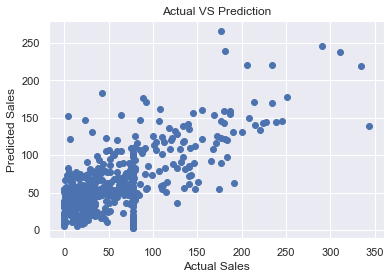



Scores for Lasso() are
Mean Absolute Error: 32.64258745288205
Mean Squared Error: 1723.250028001929
Root Mean Squared Error: 41.51204678165037
R squared score:  0.48481803276083624
Cross Validation Score is : [0.32351662 0.52079975 0.41334172 0.54914317 0.51674702]
Mean Score : 0.46470965616380033
Difference : -0.020108376597035904


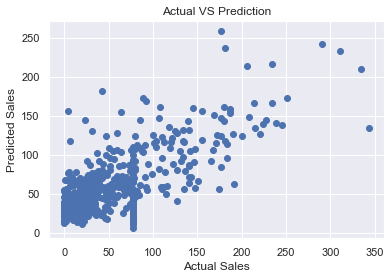



Scores for SVR() are
Mean Absolute Error: 37.85614564938348
Mean Squared Error: 2770.9478754421907
Root Mean Squared Error: 52.63979364931241
R squared score:  0.1715988078394558
Cross Validation Score is : [0.12506225 0.13423268 0.09070937 0.06491798 0.12012265]
Mean Score : 0.10700898503042056
Difference : -0.06458982280903525


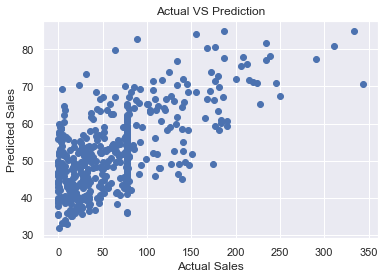



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 38.39971453578215
Mean Squared Error: 3277.9553505031186
Root Mean Squared Error: 57.25343090595636
R squared score:  0.02002410645401209
Cross Validation Score is : [ 0.03738528  0.27389436 -0.06506689  0.28467961 -0.11833923]
Mean Score : 0.08251062446431523
Difference : 0.06248651801030314


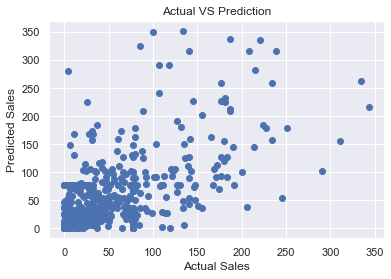



Scores for RandomForestRegressor() are
Mean Absolute Error: 28.075086000946435
Mean Squared Error: 1341.5008321441728
Root Mean Squared Error: 36.62650450349
R squared score:  0.5989455815890249
Cross Validation Score is : [0.44112479 0.62227961 0.46642141 0.64175224 0.46764908]
Mean Score : 0.5278454244162099
Difference : -0.07110015717281504


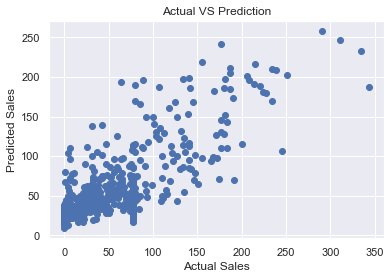



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 27.82582427385304
Mean Squared Error: 1340.6821443637598
Root Mean Squared Error: 36.615326631941436
R squared score:  0.5991903360787474
Cross Validation Score is : [0.42168118 0.63204859 0.47794953 0.66247869 0.5125822 ]
Mean Score : 0.5413480389698574
Difference : -0.057842297108889995


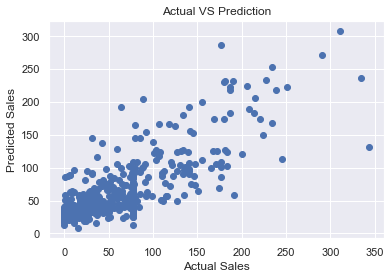

In [40]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

It is evident that GradientBoostingRegressor() gives the best result. Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

# Hyperparamter Tuning and treating overfitting/underfitting

In [41]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [42]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3]
}

In [43]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'squared_error',
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [44]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.6128546599263347
The mean absolute error 29.857791540583396
root_mean_squared_error: 41.56475397800518


In [45]:
import joblib
joblib.dump(GB,"gross_collection.obj")

['gross_collection.obj']

In [46]:
GB_l=joblib.load('gross_collection.obj')

# To prepare model for Number of votes.

# Scaling of Independent Features

In [47]:
X=dfn.drop(["votes"],axis=1)
y=dfn["votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

# Predicting the best random state

In [48]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.5092563524329761
At random state 0, The test accuracy is :0.5691534222026617


At random state 1, The training accuracy is :0.51926939049706
At random state 1, The test accuracy is :0.5642941973462052


At random state 2, The training accuracy is :0.5520668633272763
At random state 2, The test accuracy is :0.49588841143970264


At random state 3, The training accuracy is :0.5095336144201834
At random state 3, The test accuracy is :0.5768399712411856


At random state 4, The training accuracy is :0.5320802221607731
At random state 4, The test accuracy is :0.5413286975383782


At random state 5, The training accuracy is :0.5444126937054015
At random state 5, The test accuracy is :0.5129400887104224


At random state 6, The training accuracy is :0.5397407357775161
At random state 6, The test accuracy is :0.524823241524645


At random state 7, The training accuracy is :0.5461162634265684
At random state 7, The test accuracy is :0.5077222938115

At random state 75, The test accuracy is :0.4799507233179413


At random state 76, The training accuracy is :0.5313581414865137
At random state 76, The test accuracy is :0.5410669142852709


At random state 77, The training accuracy is :0.5444943180459347
At random state 77, The test accuracy is :0.5117734800408937


At random state 78, The training accuracy is :0.5137102046142943
At random state 78, The test accuracy is :0.5812562966455483


At random state 79, The training accuracy is :0.5173558406595755
At random state 79, The test accuracy is :0.5681313367564915


At random state 80, The training accuracy is :0.5545100262185669
At random state 80, The test accuracy is :0.48517038031448045


At random state 81, The training accuracy is :0.5350088600349675
At random state 81, The test accuracy is :0.5365846628890696


At random state 82, The training accuracy is :0.5389772554579506
At random state 82, The test accuracy is :0.5222751489462414


At random state 83, The training accurac

In [49]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=1)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(988, 14) (988,)
(487, 14) (487,)


Scores for LinearRegression() are
Mean Absolute Error: 78796.56239901212
Mean Squared Error: 11893545924.970825
Root Mean Squared Error: 109057.53492982878
R squared score:  0.5642941973462052
Cross Validation Score is : [0.4990334  0.53258358 0.51105685 0.42531668 0.50929851]
Mean Score : 0.49545780415822305
Difference : -0.06883639318798218


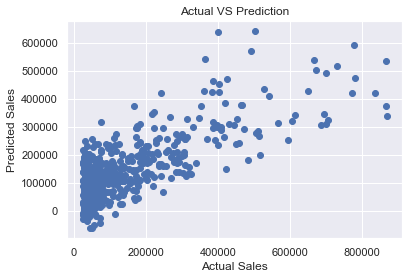



Scores for Lasso() are
Mean Absolute Error: 78796.60524579359
Mean Squared Error: 11893594341.153963
Root Mean Squared Error: 109057.75690501783
R squared score:  0.5642924236773542
Cross Validation Score is : [0.49903808 0.53258127 0.51105769 0.4253246  0.50930004]
Mean Score : 0.4954603364719034
Difference : -0.06883208720545081


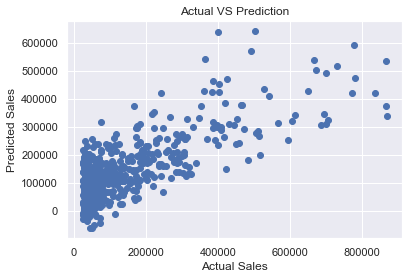



Scores for SVR() are
Mean Absolute Error: 109412.80991472698
Mean Squared Error: 31352706356.99722
Root Mean Squared Error: 177066.9544466082
R squared score:  -0.14856882672504712
Cross Validation Score is : [-0.15000892 -0.14110636 -0.19267077 -0.1329066  -0.10764378]
Mean Score : -0.14486728656878295
Difference : 0.0037015401562641714


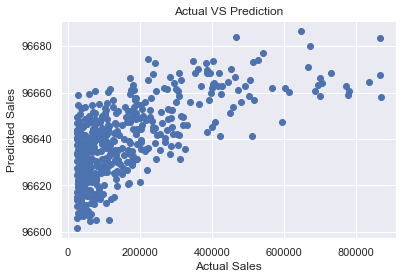



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 83826.76386036961
Mean Squared Error: 16688505637.33881
Root Mean Squared Error: 129183.99915368315
R squared score:  0.38863659419325614
Cross Validation Score is : [0.3596386  0.50018435 0.18558505 0.25771619 0.49213392]
Mean Score : 0.35905162051913775
Difference : -0.029584973674118387


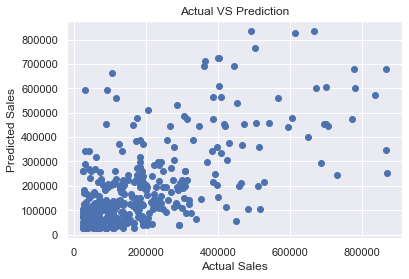



Scores for RandomForestRegressor() are
Mean Absolute Error: 60141.65858316222
Mean Squared Error: 7871998068.750644
Root Mean Squared Error: 88724.28116784403
R squared score:  0.7116187839462574
Cross Validation Score is : [0.76119848 0.72845079 0.65925759 0.59698016 0.74706616]
Mean Score : 0.6985906335330904
Difference : -0.013028150413167072


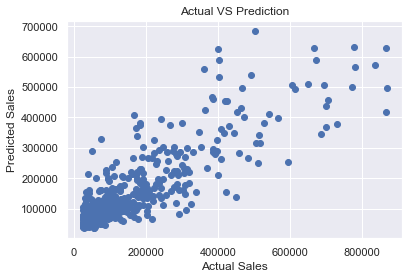



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 56807.45774452096
Mean Squared Error: 7059480667.7700815
Root Mean Squared Error: 84020.71570612858
R squared score:  0.7413843852730357
Cross Validation Score is : [0.80079765 0.78304026 0.69006714 0.66107775 0.74393112]
Mean Score : 0.7357827859368318
Difference : -0.005601599336203966


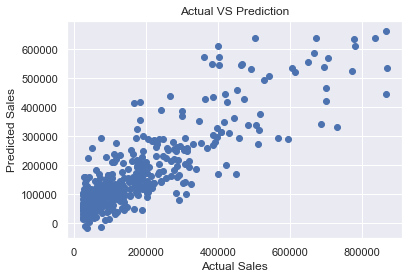

In [50]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

It is evident that GradientBoostingRegressor() gives the best result. Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

# Hyperparamter Tuning and treating overfitting/underfitting

In [51]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [52]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [53]:
GB1= GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: 0.7318090044430972
The mean absolute error 57245.83073840246
root_mean_squared_error: 85562.0342101127


In [54]:
import joblib
joblib.dump(GB1,"votes.obj")

['votes.obj']

In [56]:
GB1_l=joblib.load('votes.obj')

In [ ]:
##############################END#####################################